In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# Libraries

Data preparation

In [9]:
filename = "parental_leave.csv"
# r"C:\Users\rabbi\DataAnalysis\Parental Leave Policies\Data\parental_leave.csv"

In [8]:
import chardet

with open(filename, 'rb') as f:
    result = chardet.detect(f.read(10000))  
    print(result)

# First, let's check what encoding I need to read the data in with
# Reads the first 10,000 bytes to detect encoding

{'encoding': 'utf-8', 'confidence': 0.7525, 'language': ''}


In [10]:
data = pd.read_csv(filename, 
                   encoding='windows-1252', index_col=0)
# Reading the data


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1601 entries, Epsilon to Merrimac Industrial Sales
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Industry                1598 non-null   object 
 1   Paid Maternity Leave    1601 non-null   float64
 2   Unpaid Maternity Leave  1494 non-null   float64
 3   Paid Paternity Leave    289 non-null    float64
 4   Unpaid Paternity Leave  64 non-null     float64
 5   Unnamed: 6              0 non-null      float64
 6   Unnamed: 7              0 non-null      float64
 7   Unnamed: 8              0 non-null      float64
 8   Unnamed: 9              0 non-null      float64
dtypes: float64(8), object(1)
memory usage: 125.1+ KB


Here we have four unnamed columns with all NaN values. Looking at the csv, it's likely because of the way its formatted, with 4 extra commas at the end of each line. Let's get rid of it.

In [14]:
data = pd.read_csv(filename, 
                   encoding='windows-1252', index_col=None)
data = data.dropna(axis=1, how='all')  
# Drop columns where all values are NaN
# Make sure Company column isn't used as the index


In [15]:
data.head()

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
0,Epsilon,Advertising,6.0,6.0,6.0,6.0
1,The Walt Disney Company,Arts & Entertainment,5.0,4.0,4.5,4.0
2,Guild Education,Business Services: Other,14.0,0.0,8.0,4.0
3,WeWork,Business Services: Other,14.0,2.0,16.0,4.0
4,Randstad USA,Business Services: Staffing & Outsourcing,5.0,7.0,0.0,0.0


In [16]:
data.columns

Index(['Company', 'Industry', 'Paid Maternity Leave', 'Unpaid Maternity Leave',
       'Paid Paternity Leave', 'Unpaid Paternity Leave'],
      dtype='object')

This is what the data looks like, we can start analysis.

-- Which companies offer the most paid parental leave weeks?

In [17]:
data['Total Paid Parental Leave'] = data['Paid Maternity Leave'] + data['Paid Paternity Leave']
top_companies = data[['Company', 'Total Paid Parental Leave']].sort_values(by='Total Paid Parental Leave', ascending=False).head(5)

In [18]:
top_companies

,Company,Total Paid Parental Leave
47,Grant Thornton,102.0
148,LAC-Group,67.5
129,Flatiron Health,60.0
248,Salesforce,52.0
188,Bill and Melinda Gates Foundation,52.0


-- Is maternity leave typically longer than paternity leave?

In [19]:
avg_paid_maternity = data['Paid Maternity Leave'].mean()
avg_paid_paternity = data['Paid Paternity Leave'].mean()

averages = pd.DataFrame({
    'Avg Paid Maternity Leave': [avg_paid_maternity],
    'Avg Paid Paternity Leave': [avg_paid_paternity]
})

In [20]:
averages

,Avg Paid Maternity Leave,Avg Paid Paternity Leave
0,10.909119,7.33218


-- What is the distribution of parental leave weeks offered?

In [28]:
maternity_stats = data[['Paid Maternity Leave', 'Unpaid Maternity Leave']].describe()

In [29]:
maternity_stats

,Paid Maternity Leave,Unpaid Maternity Leave
count,1601.000000,1494.000000
mean,10.909119,6.628849
std,8.024514,9.274953
min,0.000000,0.000000
25%,6.000000,0.000000
50%,11.000000,4.000000
75%,12.000000,10.000000
max,52.000000,52.000000


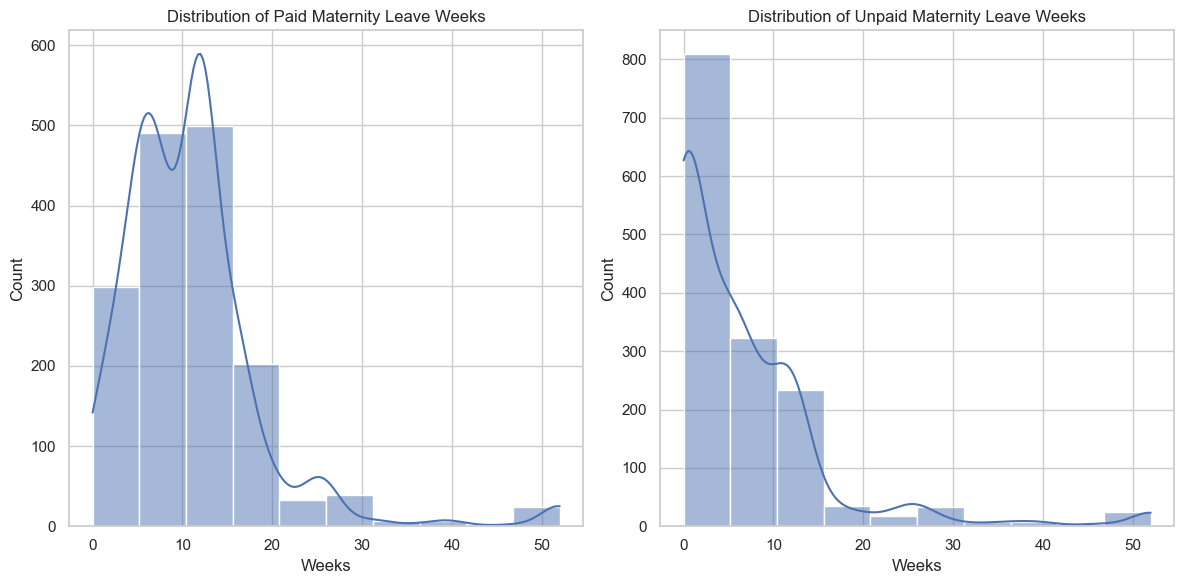

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Paid Maternity Leave'], bins=10, kde=True)
plt.title('Distribution of Paid Maternity Leave Weeks')
plt.xlabel('Weeks')

plt.subplot(1, 2, 2)
sns.histplot(data['Unpaid Maternity Leave'], bins=10, kde=True)
plt.title('Distribution of Unpaid Maternity Leave Weeks')
plt.xlabel('Weeks')

plt.tight_layout()
plt.show()

In [30]:
paternity_stats = data[['Paid Paternity Leave', 'Unpaid Paternity Leave']].describe()

In [31]:
paternity_stats

,Paid Paternity Leave,Unpaid Paternity Leave
count,289.000000,64.000000
mean,7.332180,7.734375
std,6.817591,6.831863
min,0.000000,0.000000
25%,2.000000,2.000000
50%,6.000000,6.000000
75%,12.000000,12.000000
max,51.000000,29.000000


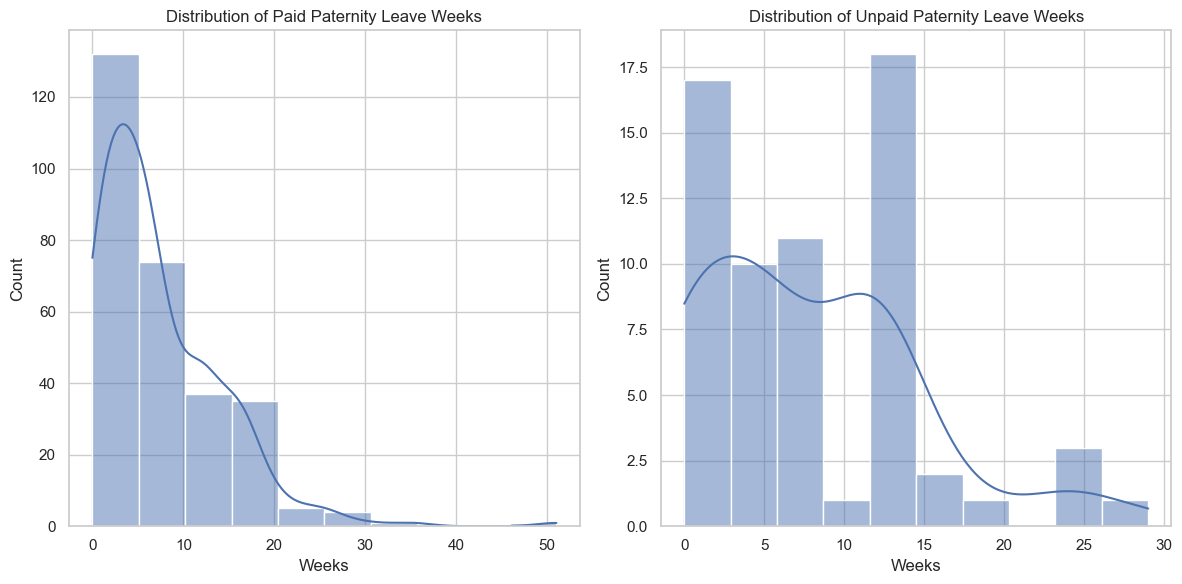

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Paid Paternity Leave'], bins=10, kde=True)
plt.title('Distribution of Paid Paternity Leave Weeks')
plt.xlabel('Weeks')

plt.subplot(1, 2, 2)
sns.histplot(data['Unpaid Paternity Leave'], bins=10, kde=True)
plt.title('Distribution of Unpaid Paternity Leave Weeks')
plt.xlabel('Weeks')

plt.tight_layout()
plt.show()

-- Are there noticable differences between industries?

In [39]:
grouped_data = data.groupby('Industry')['Total Paid Parental Leave'].mean().reset_index()
grouped_data.rename(columns={'Total Paid Parental Leave': 'Avg Total Paid Parental Leave'}, inplace=True)

sorted_data = grouped_data.sort_values(by='Avg Total Paid Parental Leave', ascending=False)
#sorted_data.head(20)

In [57]:
filtered_data = sorted_data.dropna(subset=['Avg Total Paid Parental Leave']) #drop NaN values
filtered_data = filtered_data[filtered_data['Avg Total Paid Parental Leave'] > 0]
filtered_data.head()

,Industry,Avg Total Paid Parental Leave
63,Healthcare: Telemedicine,60.00
133,Philanthropy,52.00
80,Information Services: Financial,41.00
79,Information Services: Diversified,38.25
46,Finance: Venture Capital,36.00


95 industries is too much to show for one visualization, we can look at the top 10 and bottom 10 industries instead.

In [58]:
top_industries = filtered_data.head(10)
bottom_industries = filtered_data.tail(10)
top_and_bottom = pd.concat([top_industries, bottom_industries])

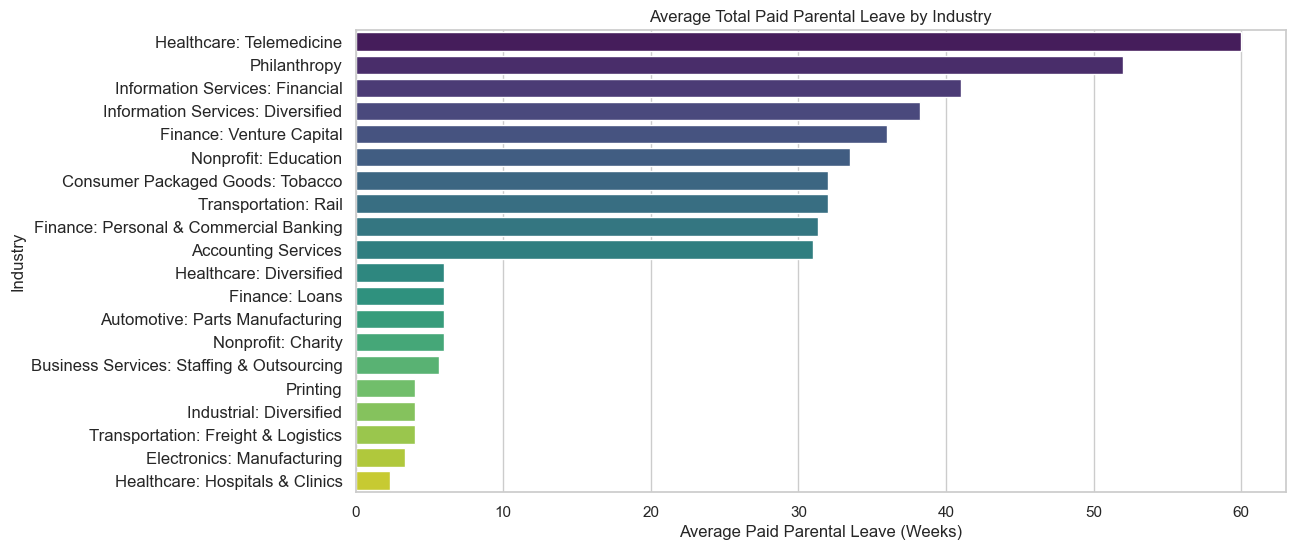

In [61]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

sns.barplot(x='Avg Total Paid Parental Leave', y='Industry', data=top_and_bottom, palette='viridis')
plt.title('Average Total Paid Parental Leave by Industry')
plt.xlabel('Average Paid Parental Leave (Weeks)')
plt.ylabel('Industry')
plt.yticks(fontsize=12)
plt.show()